In [88]:
import numpy as np

In [89]:
from numpy import ndarray

In [90]:
def sigmoid(X):
    return 1/(1+(np.e**(-X)))

In [91]:
def deriv(func, a, delta_x=0.001):
    
    return (func(a+delta_x) - func(a-delta_x)) / (delta_x*2)

In [156]:
def backward(X, Y, params):
    
    assert X.shape[1] == params["W1"].shape[0]
    

    M1 = np.dot(X,params["W1"]) #(3x3) * (3x1) = (3x1)
    P = M1 + params["b1"] #(3x1) + (3x1) = (3x1)
    # O1 = sigmoid(N1) #apply non-linear function (3x1 shape remains equal)
    # M2 = np.dot(O1,params["W2"]) #(3,1) * (1,1) = (3x1) same shape
    # P = M2 + params["b2"] #(3x1) + (1,1) = (3x1 shape remains equal)
    # # L = 1/2*((Y-P)**2) #1/2(((3x1)-(3x1))**2) = (3x1) same shape
    # L = (1/X.shape[0])*(Y-P)
    
    # dL_dP = -(Y-P)
    dL_dP = (-2/X.shape[0])*(Y-P)

    dP_db1 = np.ones_like(params["b1"])
    
    dL_db1 = (dL_dP*dP_db1).sum(axis=0)
    
    dP_dM1 = np.ones_like(M1)
    dL_dW1 = np.dot(np.transpose(X, (1,0)),
                                dP_dM1*dL_dP)
    
    gradients = {}

    gradients["b1"] = dL_db1
    gradients["W1"] = dL_dW1    
    
    return gradients

In [157]:
def generate_batch(X, 
                   y,
                   start,
                   batch_size):

    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start
    
    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]
    
    return X_batch, y_batch

In [158]:
def forward(X, params):
    
    M1 = np.dot(X,params["W1"]) #(3x3) * (3x1) = (3x1)
    P = M1 + params["b1"] #(3x1) + (3x1) = (3x1)
    
    return P

In [159]:
def permute_data(X, Y):
    perm = np.random.permutation(X.shape[0])
    return X[perm], Y[perm]

In [160]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-1.0 * x))

In [202]:
def init_weights(n):
    
    params = {}

    params["W1"] = np.random.rand(n,1) #weight for each feature (3x1)
    params["b1"] = np.random.rand(1,1) #one value to add to X*W (1x1)
#     params["W2"] = np.random.rand(13,1) #one weight for the (1x1) output of O1
#     params["b2"] = np.random.rand(1,1) #another unique value to add to O1*W2
    
    return params

In [162]:
init_params = init_weights()

In [292]:
def train(X, Y, epochs, learning_rate, batch_size):
    
#     W1 = np.random.rand(X.shape[1],hidden_size) #weight for each feature (3x1)
#     b1 = np.random.rand(1,hidden_size) #one value to add to X*W (1x1)

#     W2 = np.random.rand(hidden_size,1) #one weight for the (1x1) output of O1
#     b2 = np.random.rand(1,1) #another unique value to add to O1*W2

    params = init_weights(X.shape[1])
    gradients = backward(X, Y, params)
    error_losses = np.zeros((epochs, 40))


    # gradients.keys()

    losses = []
    b2_values = np.arange(-20,20)

    error_paradigm = np.zeros((epochs, len(b2_values)))

    
    for epoch in range(0, epochs):
    
        start = 0


        if start >= X.shape[0]:
            X, Y = permute_data(X, Y)
            start = 0

        # generate batch of data
        X_batch, Y_batch = generate_batch(X,Y, start=start,
                                          batch_size=batch_size)
        start += batch_size


        gradients = backward(X_batch, Y_batch, params)
        P_batch = forward(X_batch, params)

        # L = 1/2*((Y_batch-P_batch)**2) #1/2(((3x1)-(3x1))**2) = (3x1) same shape
        L =  np.mean(np.power(Y_batch - P_batch, 2))

        
        b1_values = np.arange(-20, 20)
        W1_values = np.arange(-20, 20)
        
        losses_l = []
        
        for i in range(len(b1_values)):
            my_z = params.copy()
            my_z["b1"] = b1_values[i]
            my_z["W1"] = W1_values[i]

            losses_l.append((1/2*(y_train - forward(X_train, my_z))**2).mean())
        
        error_losses[epoch] = np.array([losses_l])
        
        # print(L.mean())
        losses.append(L.mean())

        for param in gradients.keys():

            params[param] -= learning_rate*gradients[param]
    
    return params, losses, error_losses

In [293]:
def predict(X, params):
    
    M1 = np.dot(X, params['W1'])

    P = M1 + params['b1']

    return P
    

In [294]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

________

In [295]:
import pandas as pd

In [296]:
# from sklearn.datasets import load_boston
boston = pd.read_csv("boston.csv", index_col=[0])

data = boston.drop(columns="Price").values
target = boston.Price.values
features = boston.columns.values

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [297]:
weights, losses, error_exp = train(X_train, y_train, 10000, 0.001, 23)

In [298]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

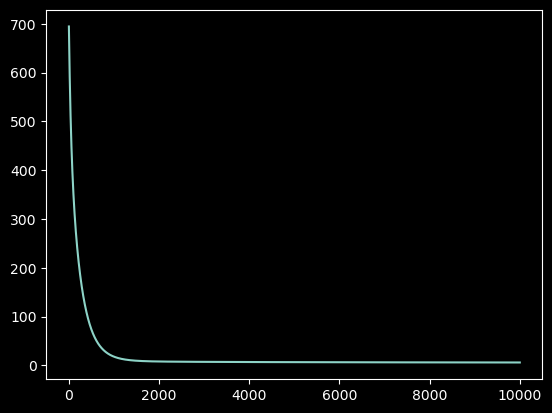

In [299]:
plt.plot(losses);

In [300]:
X_train.shape

(354, 13)

In [291]:
from IPython.display import HTML
from matplotlib import animation

In [282]:
z = weights.copy()

In [257]:
losses_l = []

In [258]:
b1_values = np.arange(-30,30)

In [259]:
for i in b1_values:
    my_z = z.copy()
    my_z["b1"] = i
    
    losses_l.append((1/2*(y_train - forward(X_train, my_z))**2).mean())
    

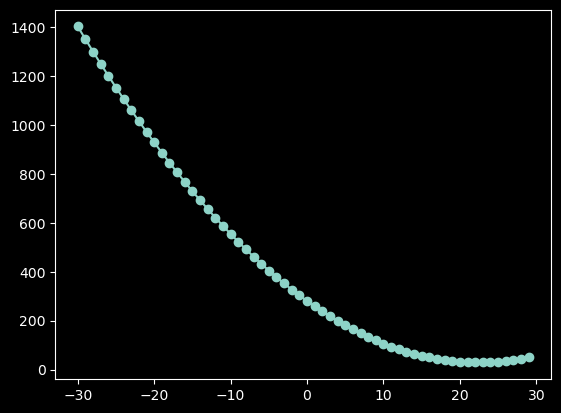

In [260]:
plt.plot(range(-30,30),losses_l, "o-");

In [261]:
from seaborn import load_dataset

In [262]:
df = load_dataset("car_crashes")[["alcohol", "total"]]

In [301]:
X = df[["alcohol"]].values
y = df[["total"]].values

In [302]:
weights, losses, error_exp = train(X, y, 1000, 0.001, 30)

In [303]:
weights

{'W1': array([[2.82441355]]), 'b1': array([[1.94080164]])}

In [304]:
from sklearn.linear_model import LinearRegression

In [305]:
lr = LinearRegression().fit(X, y)